In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

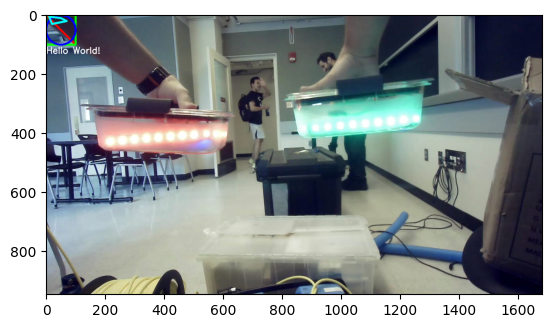

In [28]:
img = cv2.imread('image.jpg')
cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255), 5) 
cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
plt.imshow(img)

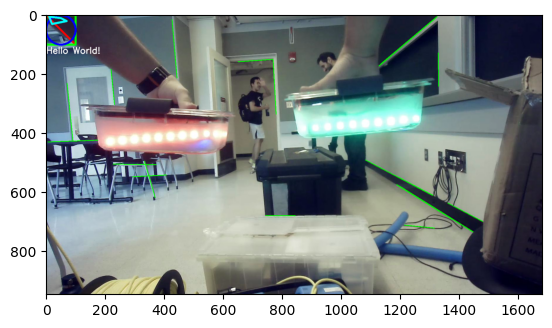

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 500, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)

In [30]:
from dt_apriltags import Detector

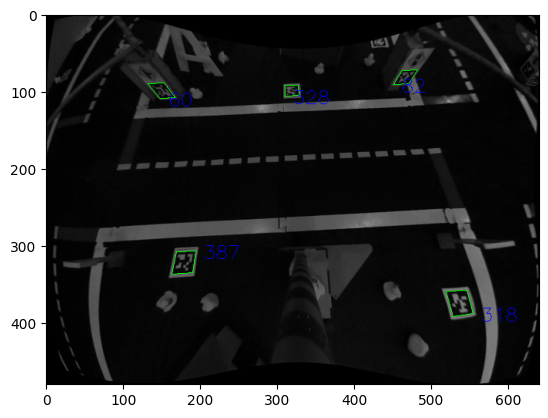

In [31]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
plt.imshow(color_img)

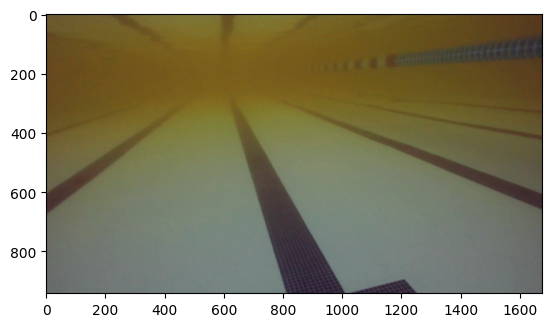

In [43]:
img = cv2.imread('rov_pool.jpg')
plt.imshow(img)

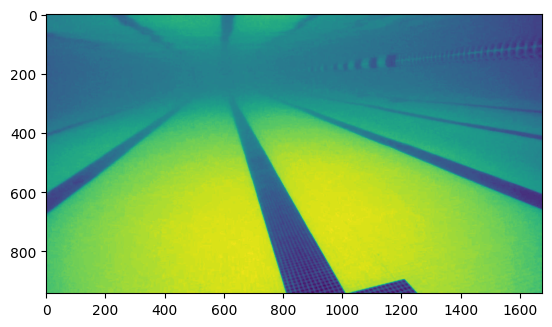

In [44]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
plt.imshow(gray)

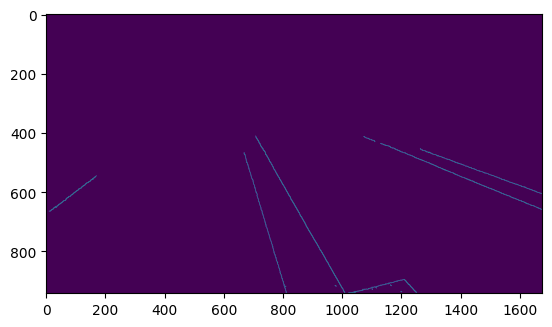

In [73]:
edges = cv2.Canny(gray, 800, 1200, apertureSize=5) # detect edges
plt.imshow(edges)

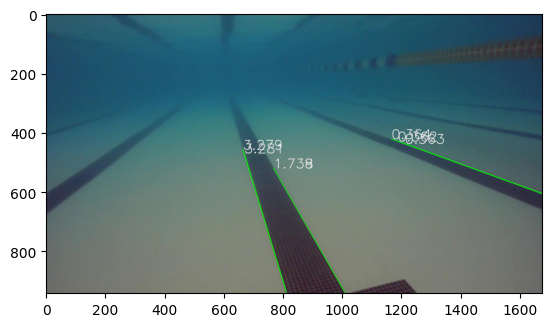

In [74]:
slopes = []
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=450,
                maxLineGap=30,
        ) # detect lines
for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y2-y1)/(x2-x1)
    cv2.putText(img, f'{round(slope,3)}', (x1,y1),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1.5,
                color=(225, 225, 225),
                thickness=2)
    slopes.append(slope)
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [75]:
cap = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = cap.read()

In [78]:
while ret == True:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert to grayscale
    edges = cv2.Canny(frame, 800, 1200, apertureSize=5) # detect edges
    slopes = []
    lines = cv2.HoughLinesP(
                    edges,
                    1,
                    np.pi/180,
                    100,
                    minLineLength=450,
                    maxLineGap=30,
            ) # detect lines
    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2-y1)/(x2-x1)
        cv2.putText(frame, f'{round(slope,3)}', (x1,y1),
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=1.5,
                    color=(225, 225, 225),
                    thickness=2)
        slopes.append(slope)
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

KeyboardInterrupt: 